In [18]:
pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 14.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 239.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression



In [14]:
df= pd.read_csv('magic04.data')

In [15]:
print(df)

        28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2     

In [16]:
#cols is list of column names to add in table
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

df=pd.read_csv('magic04.data',names=cols)
pd.read_csv('magic04.data',names=cols)

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [17]:
df["class"].unique()


array(['g', 'h'], dtype=object)

In [18]:
# convert g to 0 and h to 1
df.loc[df["class"]=='g',"class"]=0
df.loc[df["class"]=='h',"class"]=1
print(df)

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     0  
1       -9.9574   6.3609  205.2610   

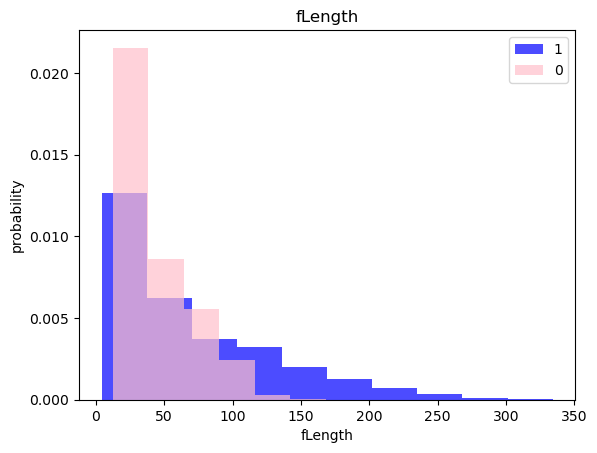

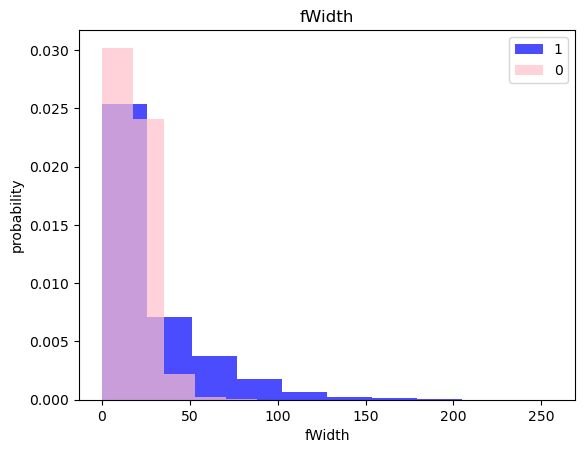

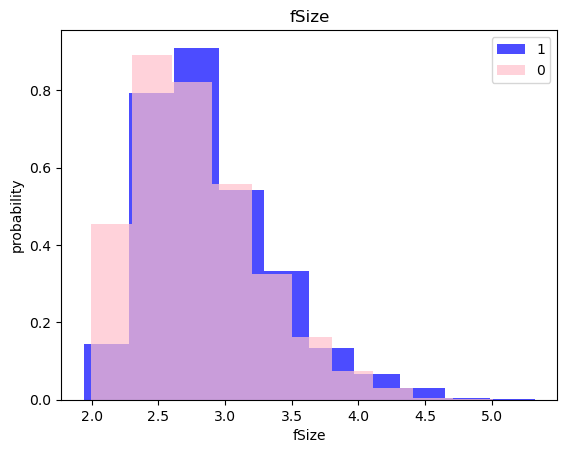

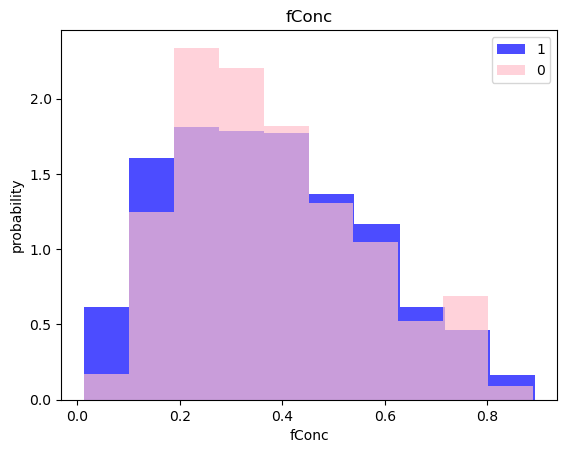

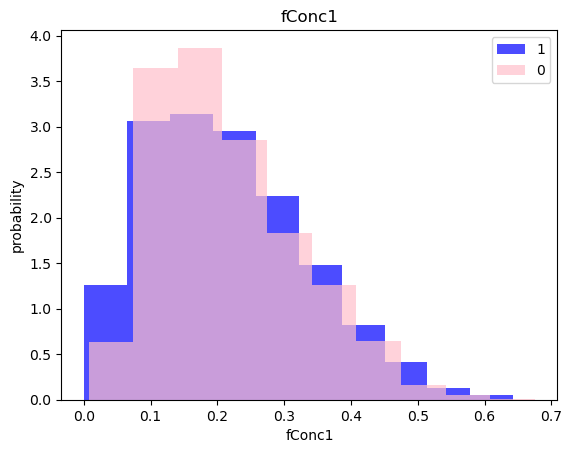

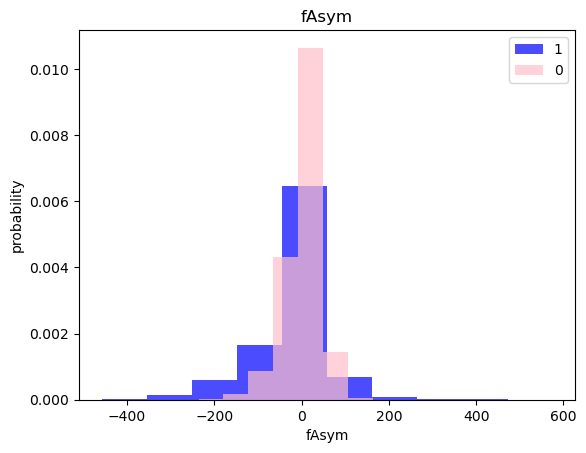

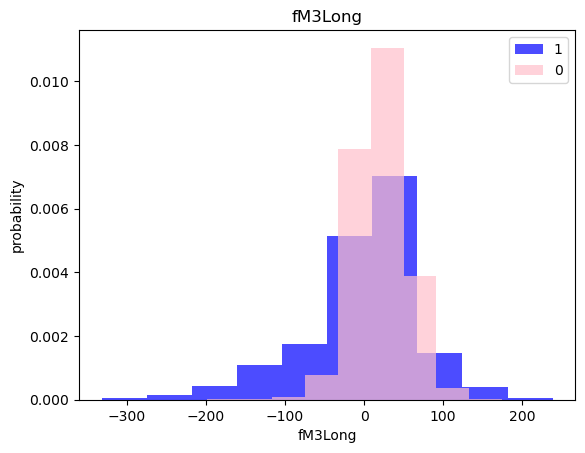

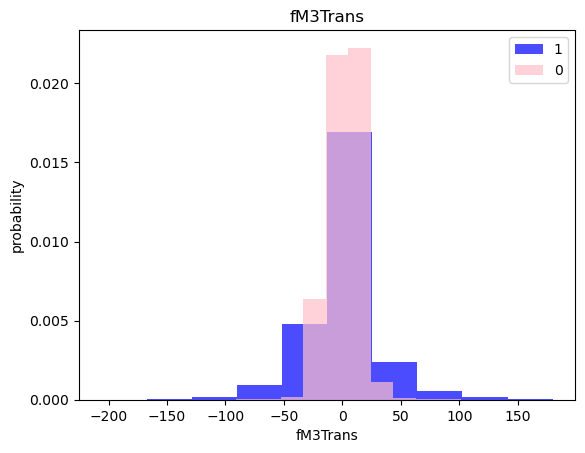

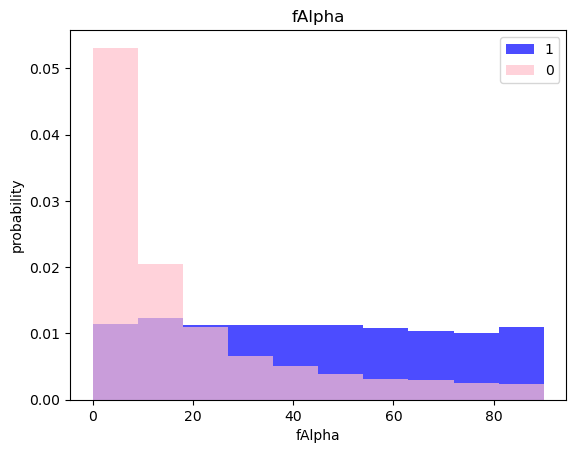

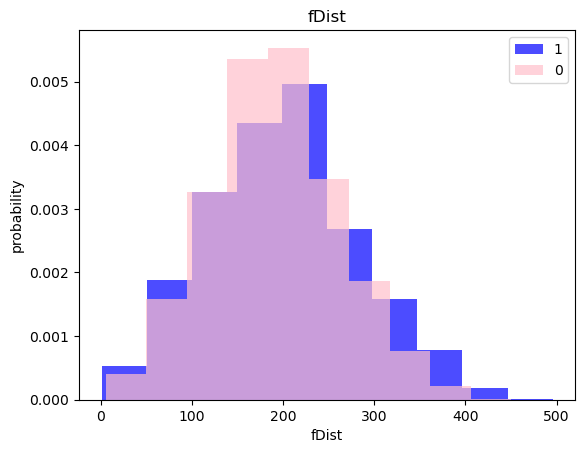

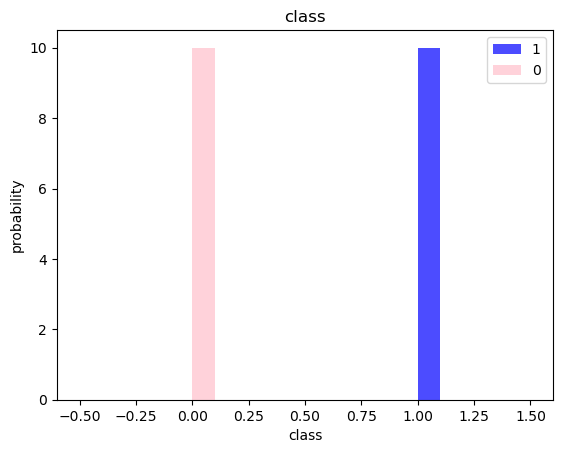

In [19]:
for label in cols:
    plt.hist(df[df["class"]==1][label], color='blue',alpha=0.7,label='1',density=True)
    plt.hist(df[df["class"]==0][label], color='pink',alpha=0.7, label='0',density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('probability')
    plt.legend()
    plt.show()

In [20]:
#creat train, validation and test datasets
#df.sample(frac=something) shuffles and returns the specified amount of rows from the data set
#eg- frac=0.5 return only half shuffled rows

train, valid, test= np.split(df.sample(frac=1), [int(60*len(df)/100),int(80*len(df)/100)])
#means 0 to 60% is train, 60% to 80% is valid and 80% to 100% is test


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))
#unequal samples not good for training, so OVERSAMPLING required
#therefore, from imblearn.over_sampling import RandomOverSampler 

4095
7317


In [22]:
#now some attributes have values in 100s and others in 0.0 something so we need to scale the data to the mean or standard deviation of that column

def scale_dfc(dfc, oversample=True):
    x=dfc[dfc.columns[:-1]].values
    y=dfc[dfc.columns[-1]].values
    y=y.astype(int)


#dfc is data frame. .values gives a list of values of that particular column
#for x, we want all columns except last("class") and for y we want just class
#create scaler variable for fit+transform
    scaler= StandardScaler()
    x=scaler.fit_transform(x)
    
    
    if (oversample):
        
        ros=RandomOverSampler()
        x, y=ros.fit_resample(x,y)
    
    w=np.reshape(y,(-1,1))
    new_dfc=np.hstack((x,w))
    return new_dfc,x,y
    
    
                     
    


In [23]:
train, x_train, y_train= scale_dfc(train)
valid, x_valid, y_valid= scale_dfc(valid)
test, x_test, y_test= scale_dfc(test)
#now data is properly formatted


KNN


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_model= KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_model.fit(x_train,y_train)
#training


KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred= knn_model.predict(x_test)
"""In Classification:
When you use .predict() on a KNN model for classification, it works as follows:

Input: You pass in a new set of features (X_new), which represents the new data you want to predict the class for. These features must match the format and dimensionality of the data that was used to train the model.

Find Neighbors: The model computes the distances between the new data point and every data point in the training set. Typically, Euclidean distance is used (though other distance metrics like Manhattan or Minkowski can also be used).

Select Nearest Neighbors: The model identifies the k closest training points based on the distance metric.

Majority Voting: The most common class among the k neighbors is assigned to the new data point. This is how the model decides the predicted class for the new point.

"""

'In Classification:\nWhen you use .predict() on a KNN model for classification, it works as follows:\n\nInput: You pass in a new set of features (X_new), which represents the new data you want to predict the class for. These features must match the format and dimensionality of the data that was used to train the model.\n\nFind Neighbors: The model computes the distances between the new data point and every data point in the training set. Typically, Euclidean distance is used (though other distance metrics like Manhattan or Minkowski can also be used).\n\nSelect Nearest Neighbors: The model identifies the k closest training points based on the distance metric.\n\nMajority Voting: The most common class among the k neighbors is assigned to the new data point. This is how the model decides the predicted class for the new point.\n\n'

In [28]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [29]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2433
           1       0.84      0.75      0.79      2433

    accuracy                           0.80      4866
   macro avg       0.81      0.80      0.80      4866
weighted avg       0.81      0.80      0.80      4866



In [22]:
'''Accuracy= 
Total Number of Predictions/
Number of Correct Predictions


Precision (also known as Positive Predictive Value)
True Positives (TP)
/True Positives (TP)+False Positives (FP)

Recall (also known as Sensitivity, True Positive Rate, or Hit Rate)
True Positives (TP)
/True Positives (TP)+False Negatives (FN)

The F1 score is a metric that combines precision and recall into a single number to provide a more balanced evaluation of a model, especially when you care about both the false positives and false negatives
[Precision*Recall/
Precision+Recall]*2


'''


'Accuracy= \nTotal\xa0Number\xa0of\xa0Predictions/\nNumber\xa0of\xa0Correct\xa0Predictions\n\n\nPrecision (also known as Positive Predictive Value)\nTrue\xa0Positives\xa0(TP)\n/True\xa0Positives\xa0(TP)+False\xa0Positives\xa0(FP)\n\nRecall (also known as Sensitivity, True Positive Rate, or Hit Rate)\nTrue\xa0Positives\xa0(TP)\n/True\xa0Positives\xa0(TP)+False\xa0Negatives\xa0(FN)\n\nThe F1 score is a metric that combines precision and recall into a single number to provide a more balanced evaluation of a model, especially when you care about both the false positives and false negatives\n[Precision*Recall/\nPrecision+Recall]*2\n\n\n'

#### NAIVE BAYES

- P(A|B)= no. (A intersec B)/B
- no. (A intersec B)= P(A).P(B) -----> for independent events
### Bayes rule
### P(A|B)= P(B|A).P(A)/P(B)
bayes rule is substitute to conditional probability


In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model= GaussianNB()
nb_model= nb_model.fit(x_train,y_train)

In [25]:
y_pred= nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.91      0.72      2433
           1       0.81      0.38      0.52      2433

    accuracy                           0.65      4866
   macro avg       0.70      0.65      0.62      4866
weighted avg       0.70      0.65      0.62      4866



### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model= LogisticRegression()
# penalty is a parameter that ican be changed
#penalty by default is l2 which is quadratic penalty

In [28]:
lg_model= lg_model.fit(x_train,y_train)

In [29]:
y_pred= lg_model.predict(x_test)
print(y_pred)

[1 0 0 ... 1 1 1]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2433
           1       0.81      0.71      0.76      2433

    accuracy                           0.77      4866
   macro avg       0.78      0.77      0.77      4866
weighted avg       0.78      0.77      0.77      4866



### SVM

In [31]:
from sklearn.svm import SVC

In [32]:
svm_model= SVC()

In [33]:
svm_model= svm_model.fit(x_train,y_train)

In [34]:
y_pred=svm_model.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2433
           1       0.89      0.79      0.84      2433

    accuracy                           0.85      4866
   macro avg       0.85      0.85      0.85      4866
weighted avg       0.85      0.85      0.85      4866



### Neural Net
Using Tensor Flow, to create a sequential neural network such that -
.sequential creates a layer
.Dense tells that the layers are interconnected along with activation formula type mentioned


In [ ]:
pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
import tensorflow as tf

In [58]:
def plot_his(history):
    fig, (ax1,ax2)= plt.subplots(1,2)
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()


    

epochs refer to the number of times the entire training dataset is passed through the model during the training process



In [59]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        # Input layer with 10 features (input shape = (10,))
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),

        tf.keras.layers.Dropout(dropout_prob),
        #to prevent overfitting

        # First hidden layer with 32 neurons (responsible for receiving input, performing a computation, and producing an output.) and ReLU activation
        tf.keras.layers.Dense(num_nodes, activation='relu'),

        tf.keras.layers.Dropout(dropout_prob),

        # Output layer with 1 neuron and Sigmoid activation for binary classification (0 or 1)
        tf.keras.layers.Dense(1, activation='sigmoid')

        ])


    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
        metrics=['accuracy'])

    history = nn_model.fit(
    x_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_split=0.2, 
    verbose=0
    )

    return nn_model,history

    '''You are defining a simple feedforward neural network with:
    1 input layer with 10 features
    2 hidden layers, each with 32 neurons and ReLU activation
    1 output layer with 1 neuron and Sigmoid activation for binary classificatio'''


An optimizer in machine learning is an algorithm used to minimize or maximize an objective function (often referred to as the loss function or cost function), by adjusting the model's parameters (weights and biases).(by feeding back the losses while training)

##Types of optimizers
-Gradient Descent (GD)
-Stochastic Gradient Descent (SGD)
-Momentum
-Adam (Adaptive Moment Estimation)
-RMSprop

-lr is the learning rate

loss function 
-for binary classification (binary_crossentropy)
-for regression (mean_squared_error)

metrics
-specifies that accuracy will be tracked during training



BATCH SIZE- which is the number of training examples used in one forward and backward pass (i.e., one iteration).

VALIDATION SPLIT- Here, validation_split=0.2 means 20% of the training data will be used for validation during training, and 80% will be used for training the model.

VERBOSE
verbose=0: No output. No progress bar or logging.
verbose=1: Displays a progress bar showing the progress of each epoch.
verbose=2: Displays one line per epoch, including loss and metrics.

HISTORY
The history object will store the loss and accuracy metrics for both training and validation data for each epoch.
history object is an instance of the tensorflow.keras.callbacks.History class.
The key data stored in the history object is in the form of a dictionary (history.history)
The keys are the names of the metrics that were tracked during training (e.g., 'loss', 'accuracy', 'val_loss', 'val_accuracy').
The values are lists (or arrays) of metric values, one for each epoch.


LOSS- training loss
ACCURACY- training
VAL_LOSS- during validation
VAL_ACCURACY- during validation





16 nodes, dropout 0, lr 0.1, batch size 32


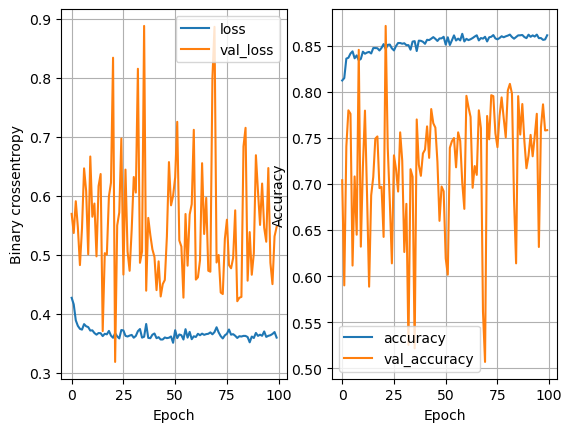

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8600 - loss: 0.3703
16 nodes, dropout 0, lr 0.1, batch size 64


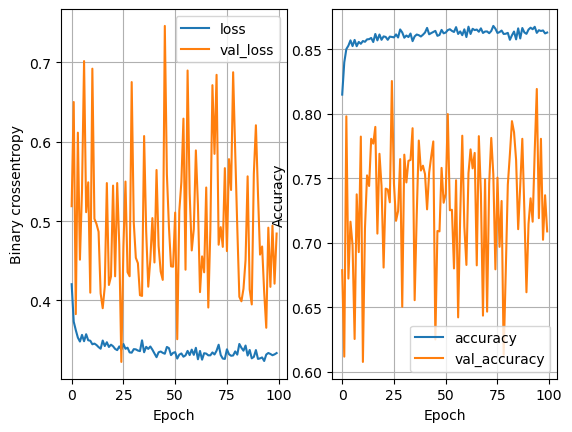

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8619 - loss: 0.3397
16 nodes, dropout 0, lr 0.1, batch size 128


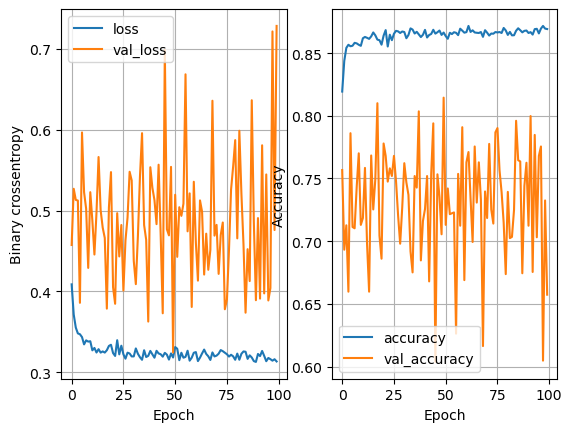

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8561 - loss: 0.3569
16 nodes, dropout 0, lr 0.005, batch size 32


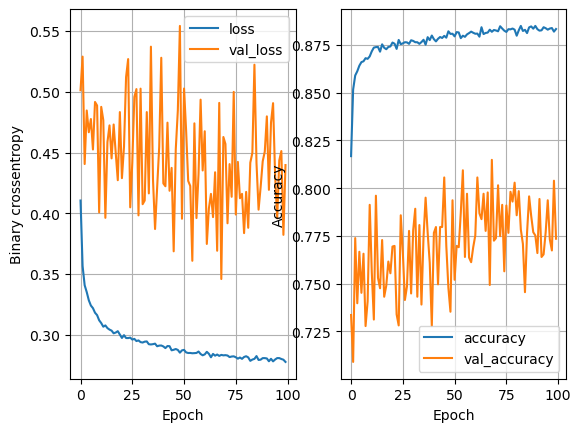

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8679 - loss: 0.3252
16 nodes, dropout 0, lr 0.005, batch size 64


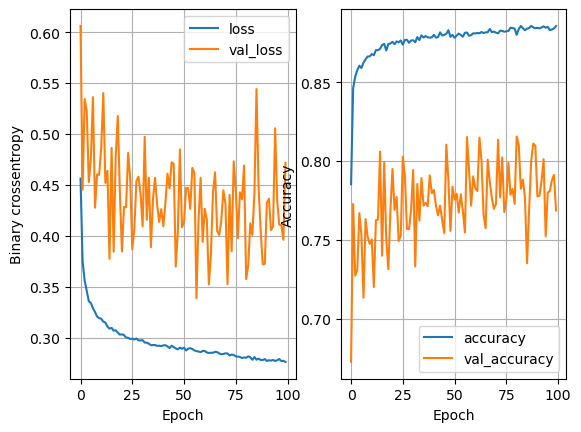

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8643 - loss: 0.3192
16 nodes, dropout 0, lr 0.005, batch size 128


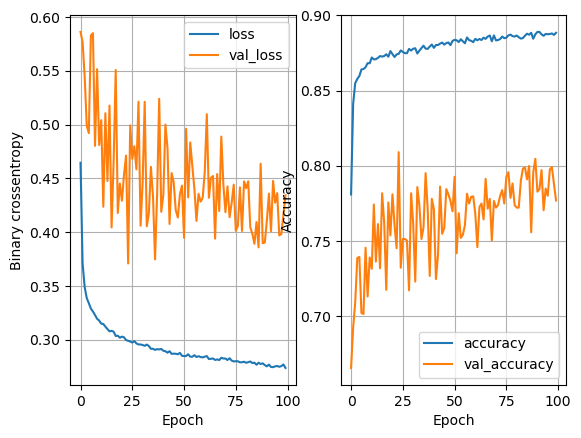

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8665 - loss: 0.3266
16 nodes, dropout 0, lr 0.001, batch size 32


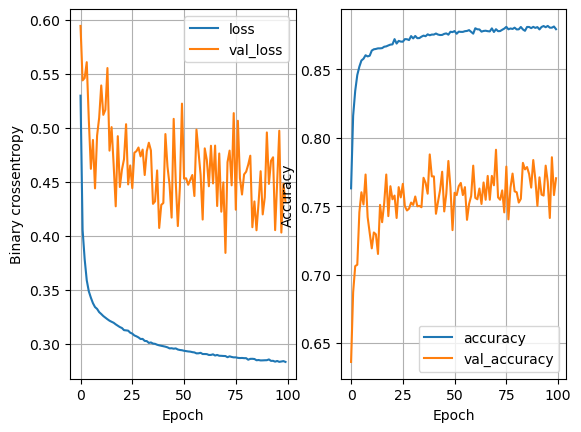

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8646 - loss: 0.3158
16 nodes, dropout 0, lr 0.001, batch size 64


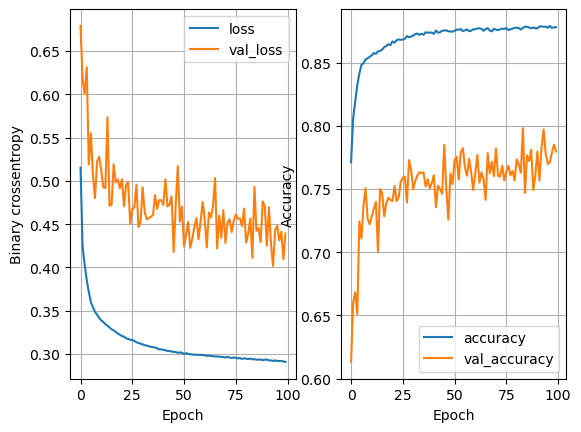

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.3202
16 nodes, dropout 0, lr 0.001, batch size 128


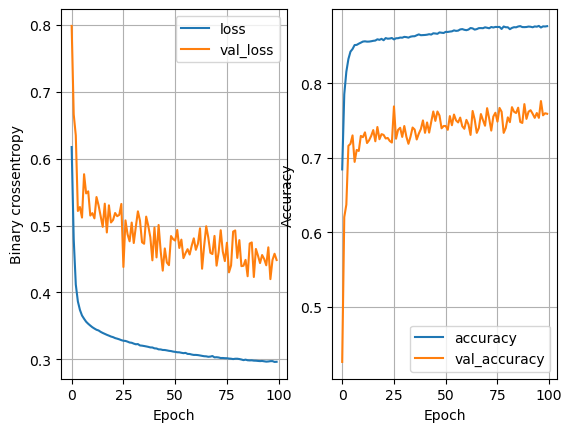

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.8683 - loss: 0.3204
16 nodes, dropout 0.2, lr 0.1, batch size 32


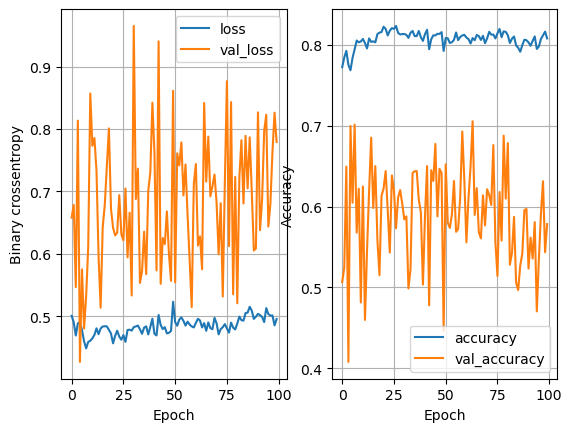

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8256 - loss: 0.4575
16 nodes, dropout 0.2, lr 0.1, batch size 64


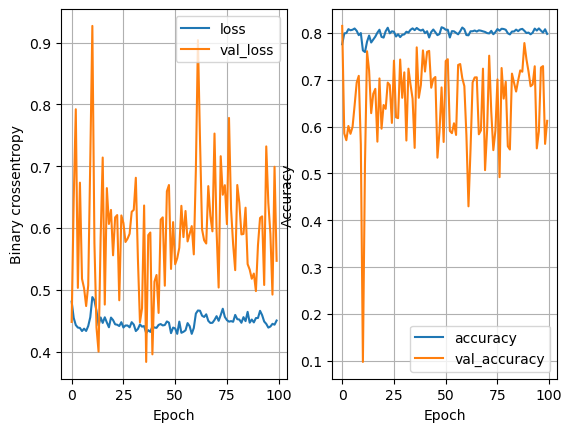

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8435 - loss: 0.3912
16 nodes, dropout 0.2, lr 0.1, batch size 128


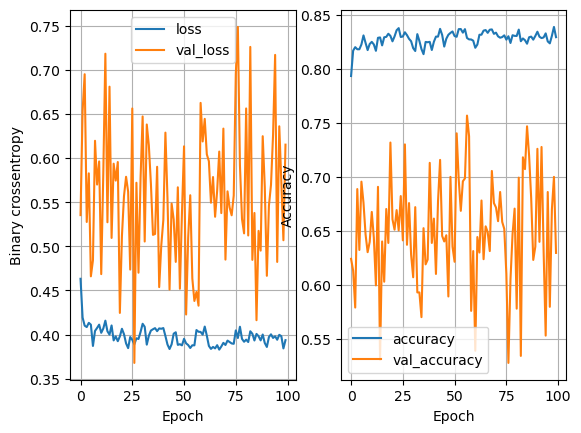

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8500 - loss: 0.3476
16 nodes, dropout 0.2, lr 0.005, batch size 32


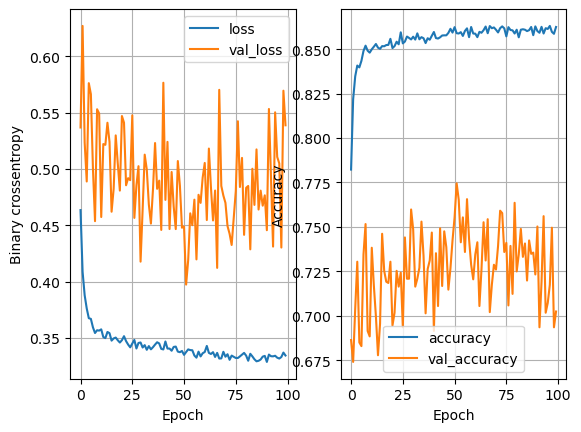

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8619 - loss: 0.3180
16 nodes, dropout 0.2, lr 0.005, batch size 64


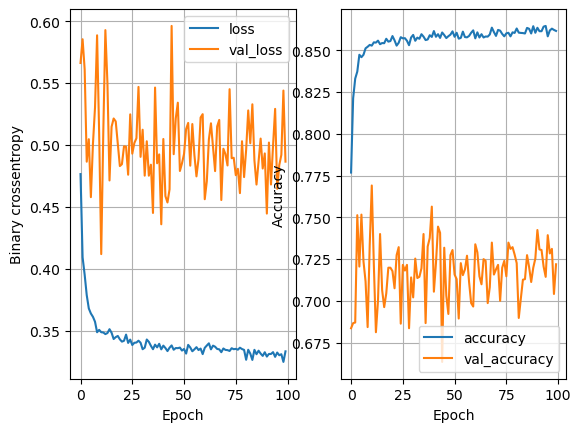

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8689 - loss: 0.3157
16 nodes, dropout 0.2, lr 0.005, batch size 128


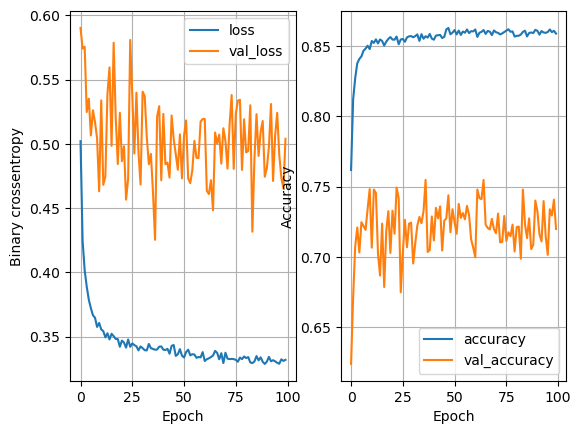

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8692 - loss: 0.3172
16 nodes, dropout 0.2, lr 0.001, batch size 32


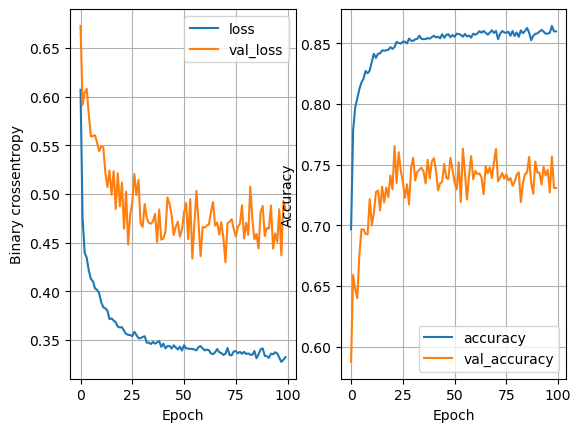

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8692 - loss: 0.3171
16 nodes, dropout 0.2, lr 0.001, batch size 64


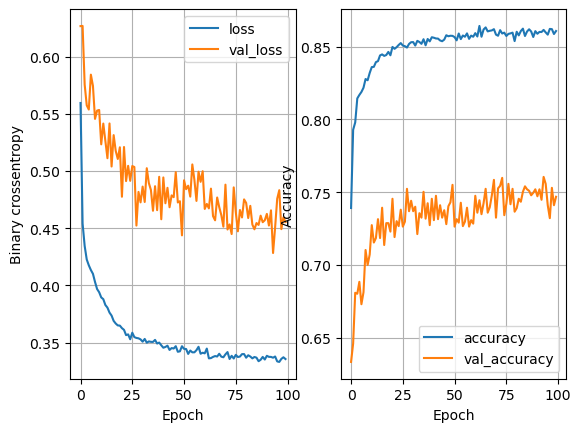

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8689 - loss: 0.3201
16 nodes, dropout 0.2, lr 0.001, batch size 128


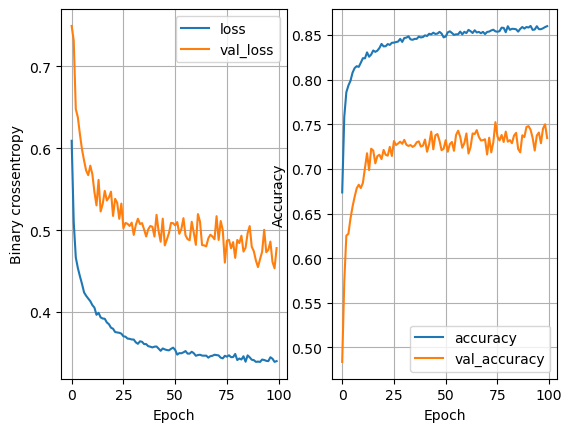

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8626 - loss: 0.3244
32 nodes, dropout 0, lr 0.1, batch size 32


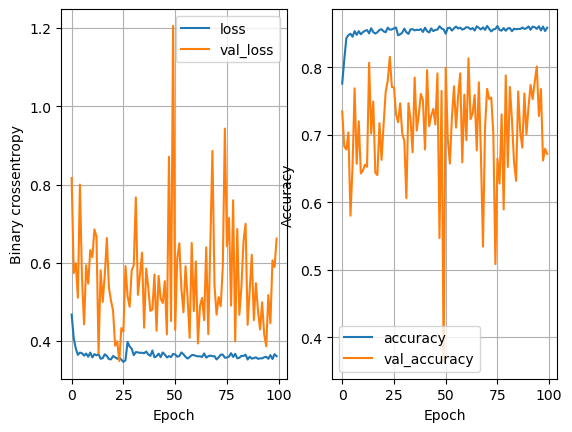

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.8518 - loss: 0.3657
32 nodes, dropout 0, lr 0.1, batch size 64


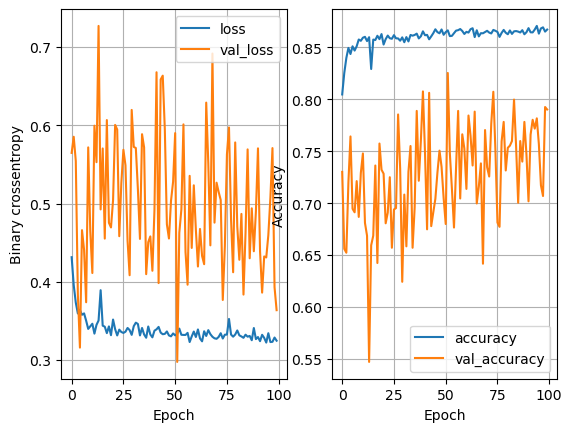

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8591 - loss: 0.3677
32 nodes, dropout 0, lr 0.1, batch size 128


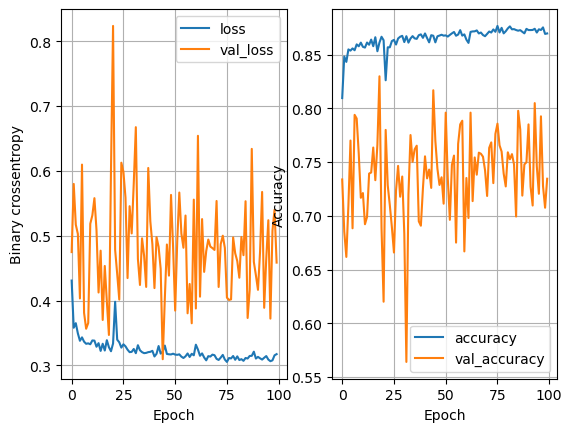

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.8637 - loss: 0.3308
32 nodes, dropout 0, lr 0.005, batch size 32


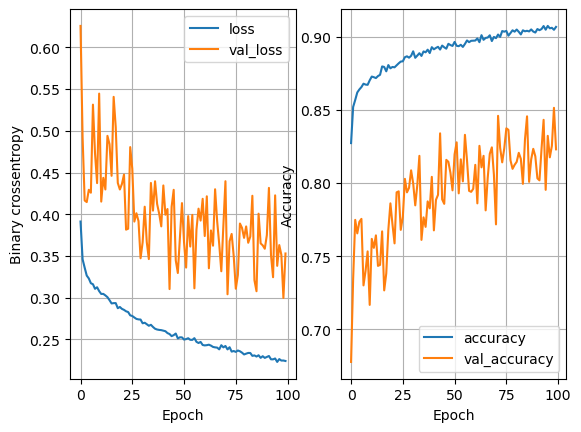

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8647 - loss: 0.3827
32 nodes, dropout 0, lr 0.005, batch size 64


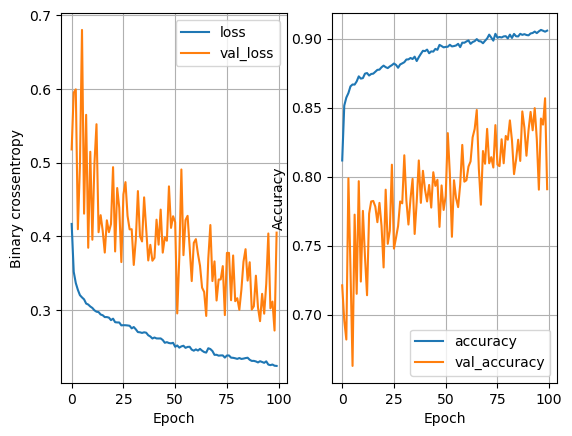

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8650 - loss: 0.3776
32 nodes, dropout 0, lr 0.005, batch size 128


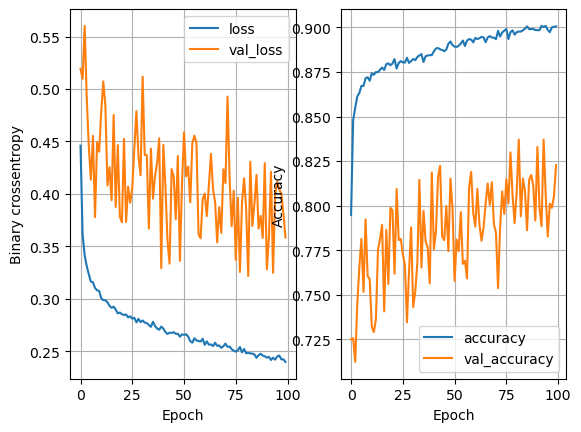

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8659 - loss: 0.3546
32 nodes, dropout 0, lr 0.001, batch size 32


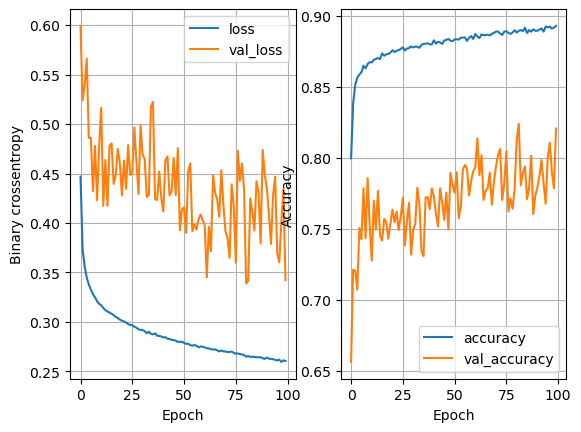

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8664 - loss: 0.3256
32 nodes, dropout 0, lr 0.001, batch size 64


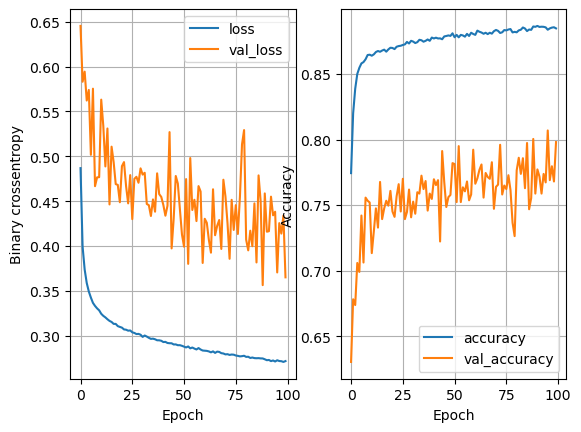

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8682 - loss: 0.3182
32 nodes, dropout 0, lr 0.001, batch size 128


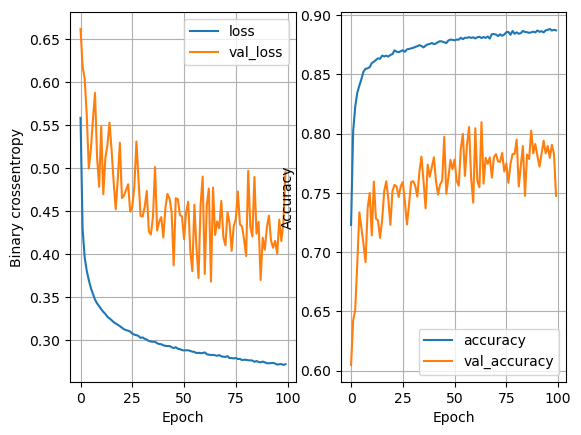

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8676 - loss: 0.3211
32 nodes, dropout 0.2, lr 0.1, batch size 32


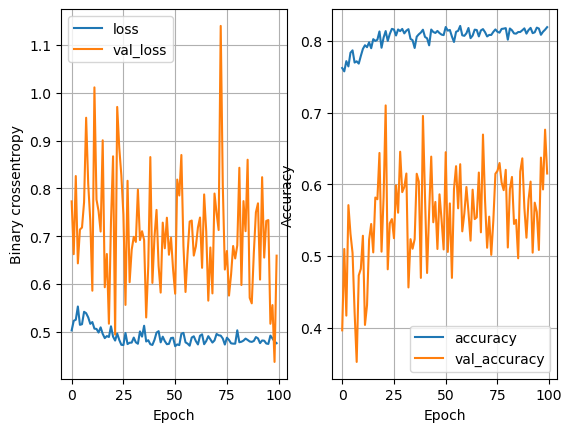

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8360 - loss: 0.4294
32 nodes, dropout 0.2, lr 0.1, batch size 64


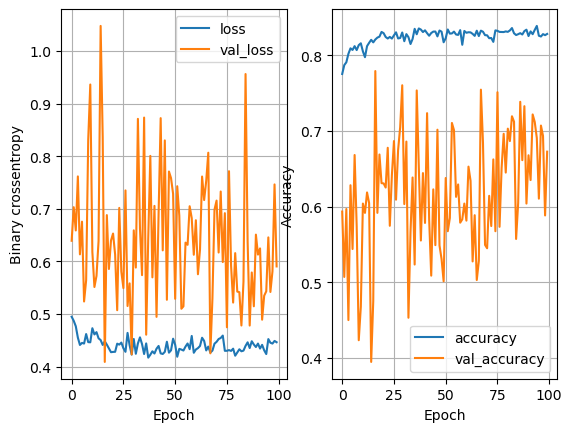

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8367 - loss: 0.4211
32 nodes, dropout 0.2, lr 0.1, batch size 128


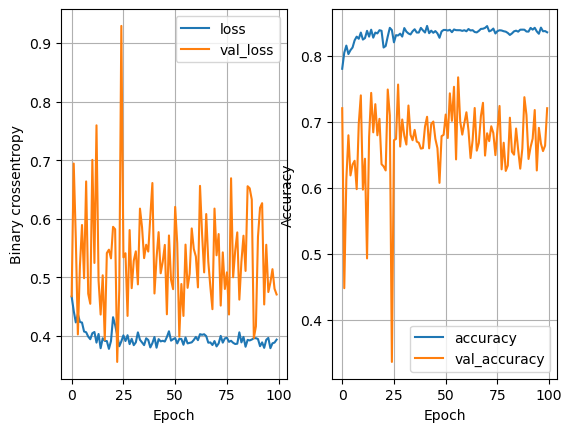

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8639 - loss: 0.3393
32 nodes, dropout 0.2, lr 0.005, batch size 32


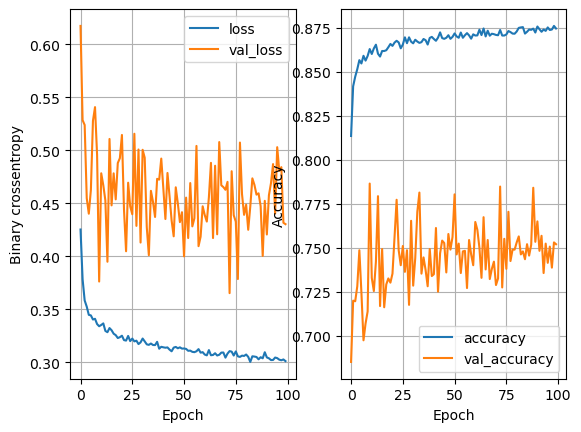

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8725 - loss: 0.3088
32 nodes, dropout 0.2, lr 0.005, batch size 64


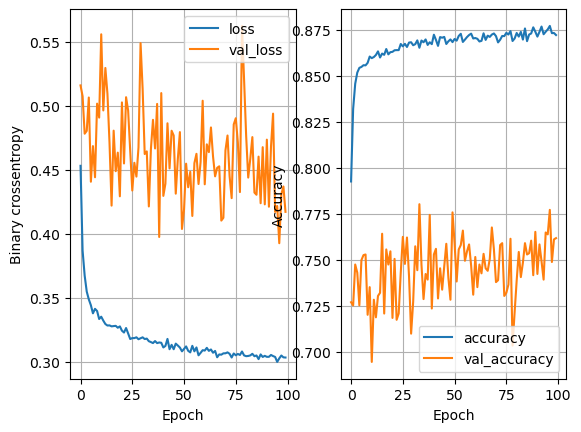

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8693 - loss: 0.3111
32 nodes, dropout 0.2, lr 0.005, batch size 128


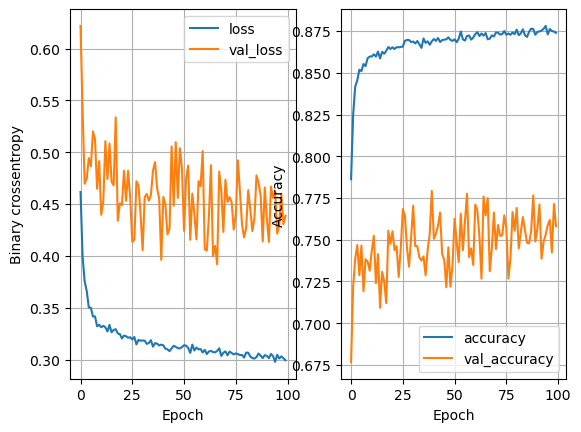

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8729 - loss: 0.3095
32 nodes, dropout 0.2, lr 0.001, batch size 32


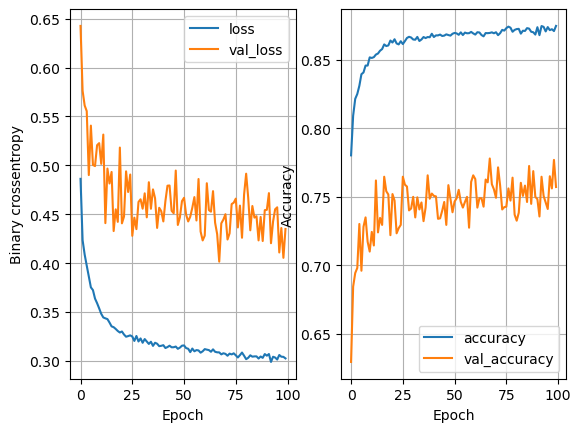

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8758 - loss: 0.3113
32 nodes, dropout 0.2, lr 0.001, batch size 64


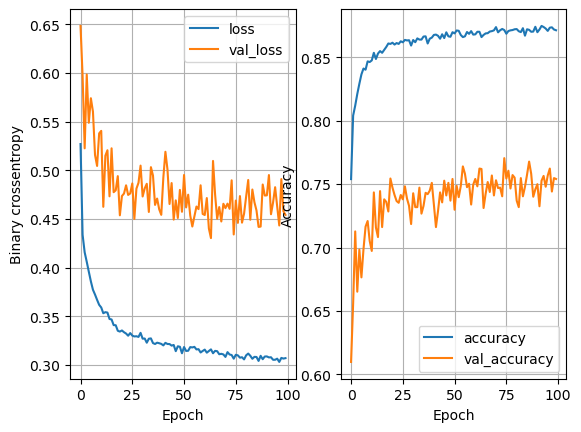

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8693 - loss: 0.3073
32 nodes, dropout 0.2, lr 0.001, batch size 128


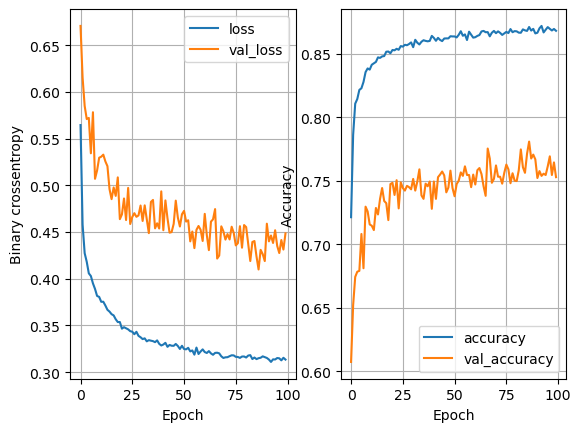

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8676 - loss: 0.3137
64 nodes, dropout 0, lr 0.1, batch size 32


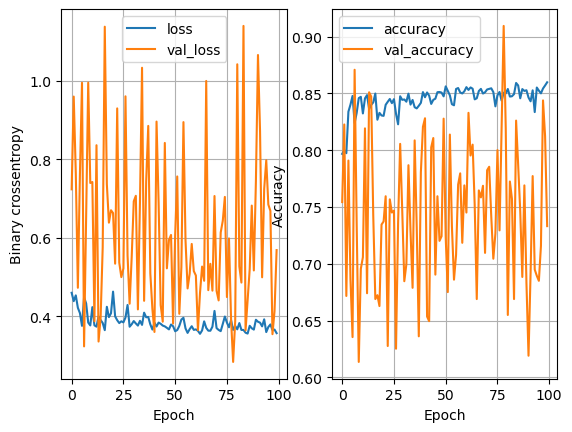

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8489 - loss: 0.3658
64 nodes, dropout 0, lr 0.1, batch size 64


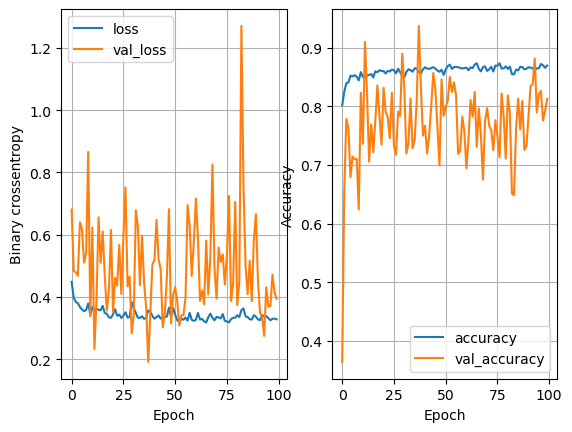

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8495 - loss: 0.3506
64 nodes, dropout 0, lr 0.1, batch size 128


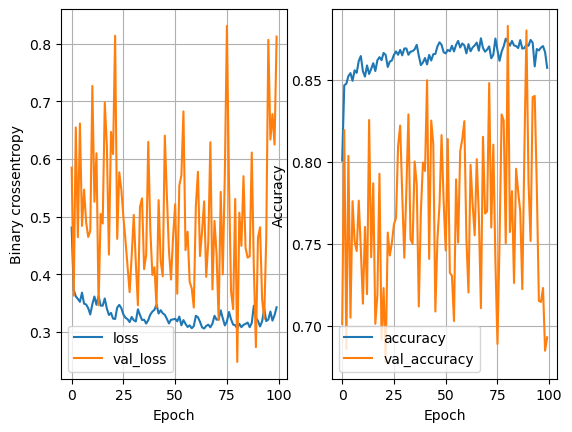

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8581 - loss: 0.3789
64 nodes, dropout 0, lr 0.005, batch size 32


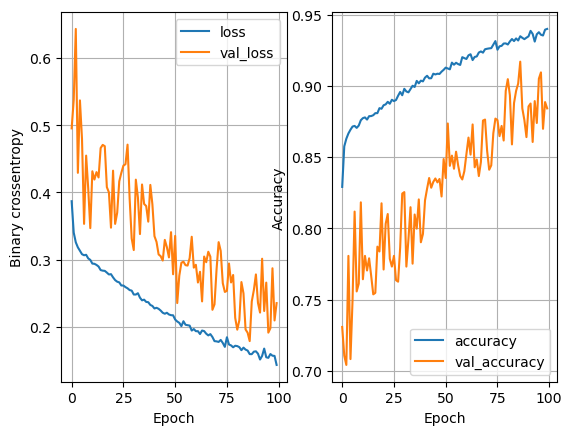

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.8526 - loss: 0.6368
64 nodes, dropout 0, lr 0.005, batch size 64


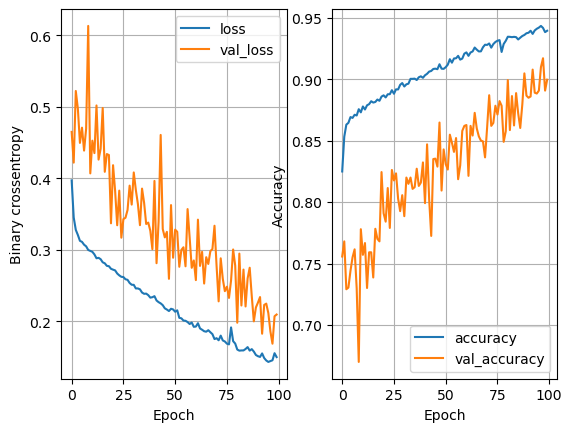

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8506 - loss: 0.6184
64 nodes, dropout 0, lr 0.005, batch size 128


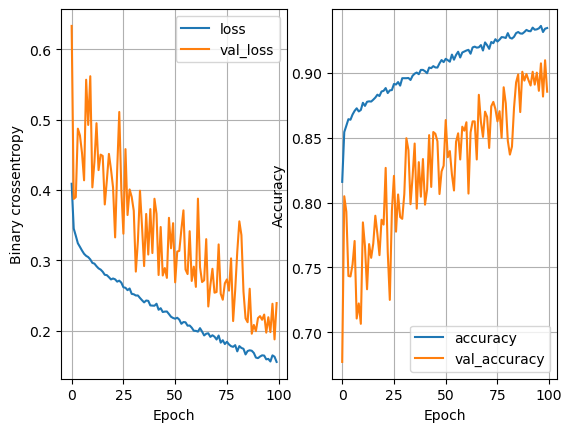

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8492 - loss: 0.5262
64 nodes, dropout 0, lr 0.001, batch size 32


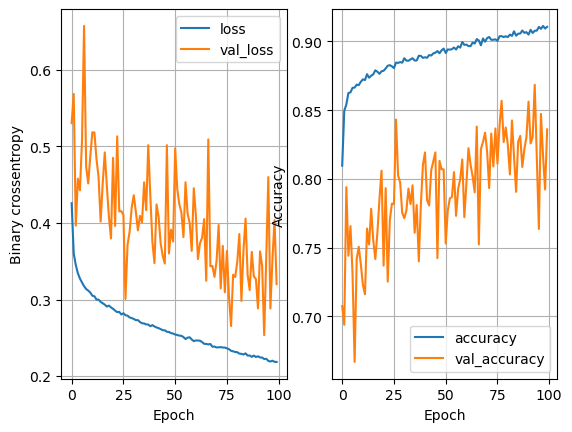

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8575 - loss: 0.3584
64 nodes, dropout 0, lr 0.001, batch size 64


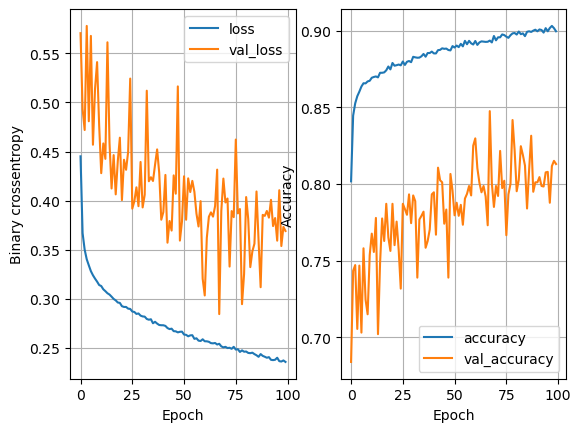

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8637 - loss: 0.3420
64 nodes, dropout 0, lr 0.001, batch size 128


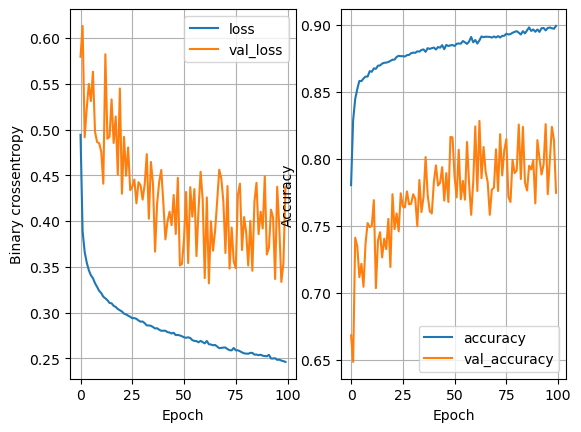

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8648 - loss: 0.3245
64 nodes, dropout 0.2, lr 0.1, batch size 32


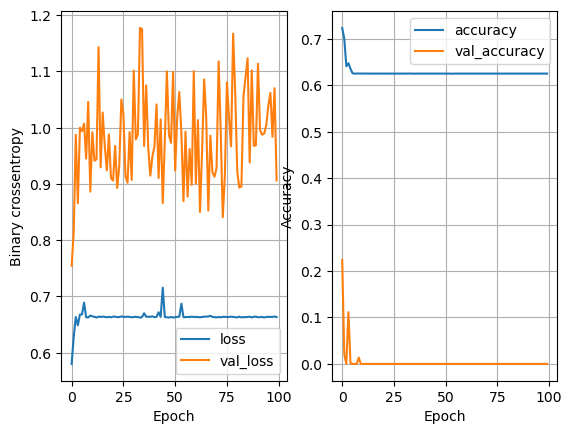

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.6312 - loss: 0.6609
64 nodes, dropout 0.2, lr 0.1, batch size 64


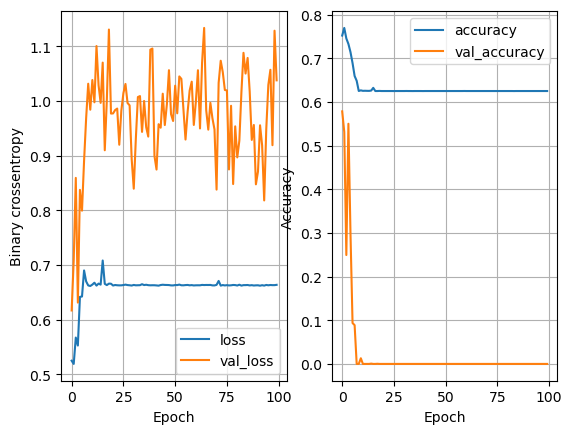

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.6312 - loss: 0.6588
64 nodes, dropout 0.2, lr 0.1, batch size 128


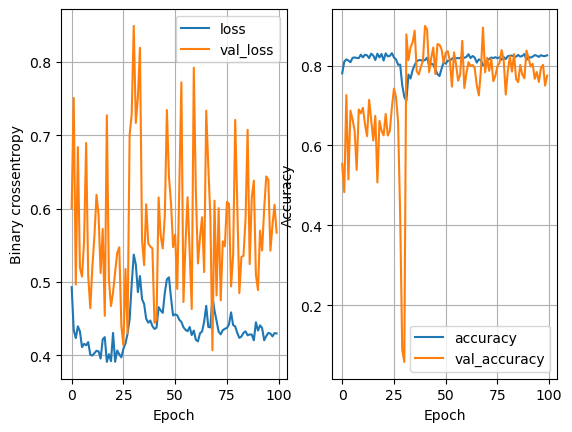

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8424 - loss: 0.3868
64 nodes, dropout 0.2, lr 0.005, batch size 32


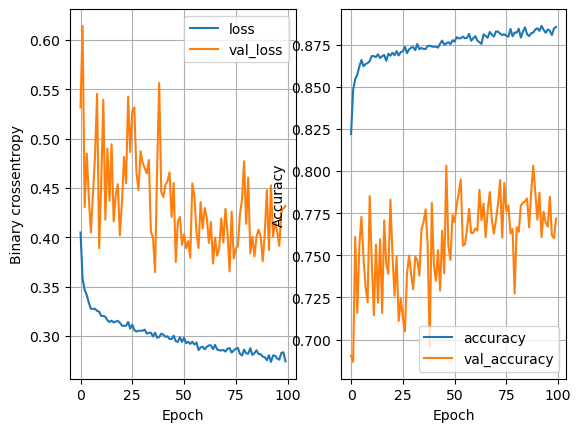

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8755 - loss: 0.3134
64 nodes, dropout 0.2, lr 0.005, batch size 64


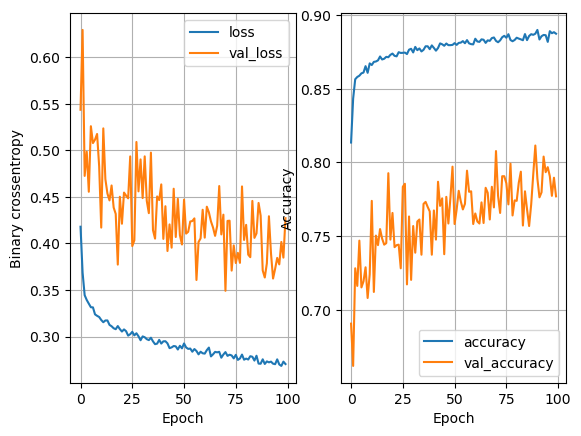

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8771 - loss: 0.3074
64 nodes, dropout 0.2, lr 0.005, batch size 128


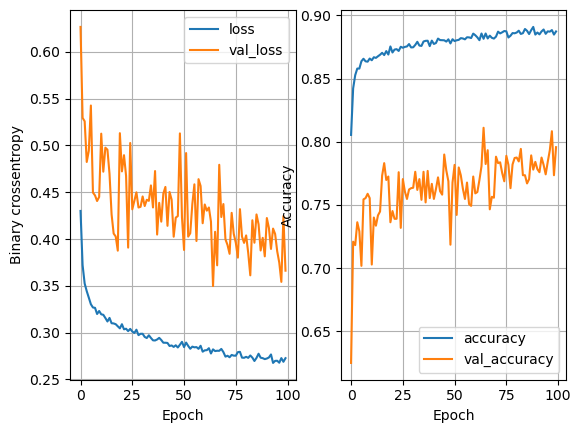

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8725 - loss: 0.3112
64 nodes, dropout 0.2, lr 0.001, batch size 32


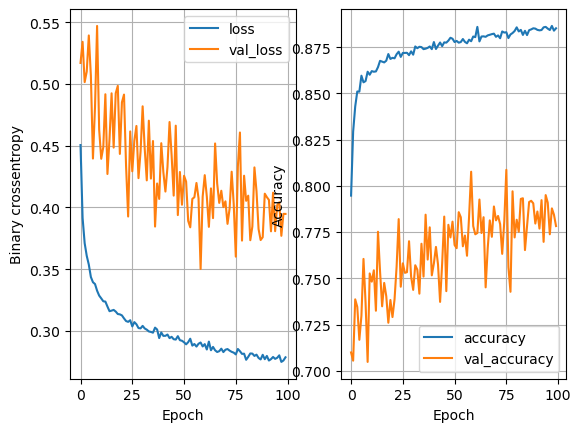

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.8746 - loss: 0.3049
64 nodes, dropout 0.2, lr 0.001, batch size 64


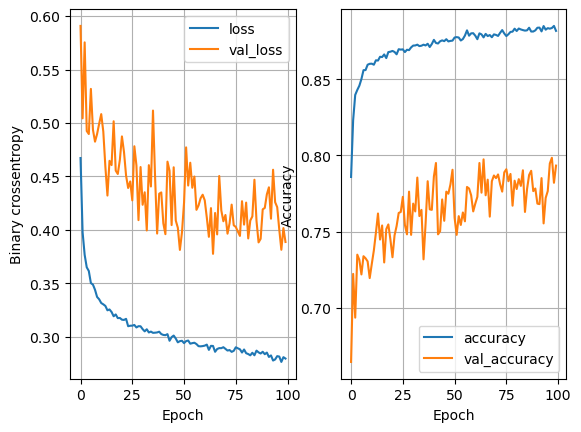

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.8781 - loss: 0.3030
64 nodes, dropout 0.2, lr 0.001, batch size 128


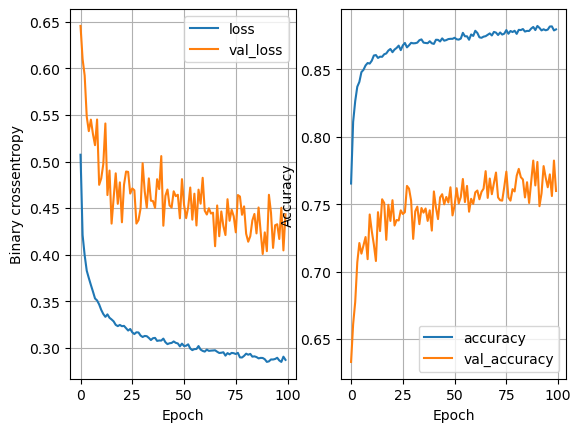

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8702 - loss: 0.3056


In [62]:
least_val_loss= float('inf')
least_loss_model=None

epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1,0.005,0.001 ]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history= train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_his(history)
                val_loss=model.evaluate(x_valid,y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model
                

In [63]:
print(least_val_loss)

0.33543825149536133


In [67]:
y_pred= least_loss_model.predict(x_test)
y_pred= (y_pred>0.5).astype(int).reshape(-1,)
#changing all decimal values above 0.5 to 1 and changing to 1d array

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


In [68]:
print(y_pred)

[0 0 0 ... 1 1 1]


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2506
           1       0.92      0.77      0.84      2506

    accuracy                           0.85      5012
   macro avg       0.86      0.85      0.85      5012
weighted avg       0.86      0.85      0.85      5012

